### Student Name: Anthony Viscovich

In [37]:
#TODO: import the modules
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn import tree

### Step 1 – Explain any overfitting or underfitting in the previous model

### Step 2 – Load the data and extract the features

In [25]:
#TODO: load the data and extract the features: 'VendorID', RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip'

features = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip']
file_path = 'trip_data.csv'
df = pd.read_csv(file_path, usecols = features)


X = df.iloc[:,0:14].to_numpy() 
y = df.iloc[:,14].tolist() 

### Step 3 – Split the data
The test set should comprise 30% of the dataset. Ensure the data is randomized and that stratified samples are obtained.

In [26]:
seed = 100

#TODO: Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.3,
                                                   random_state = seed,
                                                   stratify = y) #TODO: fill in the required options


### Step 4 – Instantiate the Decision Tree Classifer

In [27]:
dt_estimator = DecisionTreeClassifier()

### Step 5 – Create a dictionary that contains the decision tree parameters

In [28]:
params = {
    'criterion' : ['gini', 'entropy'], #a list of options for criterion.
    'max_depth' : [13, 14, 15], #TODO: provide a list of three numbers between 5 and 15 inclusive.
    'min_samples_split' : [100, 101, 102, 103, 104, 105, 106, 107, 108, 109] #TODO: provide a list of ten numbers between 100 and 500.
}

For this step, I started with a random assortment of numbers for min samples. Once I determined that the lowest number from the orginal sample was the optimal, I decided to run multiple tests to see how low I could go. This is why the numbers are in an order to determine which is the optimal. The result is shown below. 

### Step 6 – Perform the Random search
Provide the dictionary from step 5 above and use the decison tree from step 4 as the estimator.

In [31]:
rand_search = RandomizedSearchCV(estimator=dt_estimator, 
                                 param_distributions=params, 
                                 random_state=7, 
                                 scoring='accuracy', 
                                 verbose=3, #display messages while training
                                 n_iter= 60,#TODO: set n_iter to a value between 50 and 100
                                 cv=10) #TODO: set the number of folds to 10 for the cross validation


estimator = rand_search.fit(X_train, y_train)


print('Best parameters:', estimator.best_params_)
print('Best score:', estimator.best_score_) #note: if the score is low, increase n_iter or adjust the values in step 5.

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV 1/10] END criterion=gini, max_depth=13, min_samples_split=100;, score=0.882 total time=   0.2s
[CV 2/10] END criterion=gini, max_depth=13, min_samples_split=100;, score=0.886 total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=13, min_samples_split=100;, score=0.880 total time=   0.2s
[CV 4/10] END criterion=gini, max_depth=13, min_samples_split=100;, score=0.881 total time=   0.2s
[CV 5/10] END criterion=gini, max_depth=13, min_samples_split=100;, score=0.884 total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=13, min_samples_split=100;, score=0.885 total time=   0.2s
[CV 7/10] END criterion=gini, max_depth=13, min_samples_split=100;, score=0.879 total time=   0.2s
[CV 8/10] END criterion=gini, max_depth=13, min_samples_split=100;, score=0.885 total time=   0.2s
[CV 9/10] END criterion=gini, max_depth=13, min_samples_split=100;, score=0.882 total time=   0.2s
[CV 10/10] END criterion=gini, max_depth=13, m

[CV 4/10] END criterion=gini, max_depth=13, min_samples_split=108;, score=0.880 total time=   0.2s
[CV 5/10] END criterion=gini, max_depth=13, min_samples_split=108;, score=0.884 total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=13, min_samples_split=108;, score=0.885 total time=   0.2s
[CV 7/10] END criterion=gini, max_depth=13, min_samples_split=108;, score=0.878 total time=   0.2s
[CV 8/10] END criterion=gini, max_depth=13, min_samples_split=108;, score=0.885 total time=   0.2s
[CV 9/10] END criterion=gini, max_depth=13, min_samples_split=108;, score=0.881 total time=   0.2s
[CV 10/10] END criterion=gini, max_depth=13, min_samples_split=108;, score=0.886 total time=   0.2s
[CV 1/10] END criterion=gini, max_depth=13, min_samples_split=109;, score=0.881 total time=   0.2s
[CV 2/10] END criterion=gini, max_depth=13, min_samples_split=109;, score=0.885 total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=13, min_samples_split=109;, score=0.878 total time=   0.2s
[CV 4/10]

[CV 7/10] END criterion=gini, max_depth=14, min_samples_split=106;, score=0.886 total time=   0.2s
[CV 8/10] END criterion=gini, max_depth=14, min_samples_split=106;, score=0.905 total time=   0.2s
[CV 9/10] END criterion=gini, max_depth=14, min_samples_split=106;, score=0.894 total time=   0.2s
[CV 10/10] END criterion=gini, max_depth=14, min_samples_split=106;, score=0.898 total time=   0.2s
[CV 1/10] END criterion=gini, max_depth=14, min_samples_split=107;, score=0.896 total time=   0.2s
[CV 2/10] END criterion=gini, max_depth=14, min_samples_split=107;, score=0.903 total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=14, min_samples_split=107;, score=0.895 total time=   0.2s
[CV 4/10] END criterion=gini, max_depth=14, min_samples_split=107;, score=0.899 total time=   0.2s
[CV 5/10] END criterion=gini, max_depth=14, min_samples_split=107;, score=0.900 total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=14, min_samples_split=107;, score=0.903 total time=   0.2s
[CV 7/10]

[CV 10/10] END criterion=gini, max_depth=15, min_samples_split=104;, score=0.917 total time=   0.2s
[CV 1/10] END criterion=gini, max_depth=15, min_samples_split=105;, score=0.908 total time=   0.2s
[CV 2/10] END criterion=gini, max_depth=15, min_samples_split=105;, score=0.915 total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=15, min_samples_split=105;, score=0.906 total time=   0.2s
[CV 4/10] END criterion=gini, max_depth=15, min_samples_split=105;, score=0.913 total time=   0.2s
[CV 5/10] END criterion=gini, max_depth=15, min_samples_split=105;, score=0.912 total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=15, min_samples_split=105;, score=0.915 total time=   0.2s
[CV 7/10] END criterion=gini, max_depth=15, min_samples_split=105;, score=0.903 total time=   0.2s
[CV 8/10] END criterion=gini, max_depth=15, min_samples_split=105;, score=0.915 total time=   0.2s
[CV 9/10] END criterion=gini, max_depth=15, min_samples_split=105;, score=0.911 total time=   0.2s
[CV 10/10

[CV 2/10] END criterion=entropy, max_depth=13, min_samples_split=103;, score=0.898 total time=   0.2s
[CV 3/10] END criterion=entropy, max_depth=13, min_samples_split=103;, score=0.895 total time=   0.2s
[CV 4/10] END criterion=entropy, max_depth=13, min_samples_split=103;, score=0.894 total time=   0.2s
[CV 5/10] END criterion=entropy, max_depth=13, min_samples_split=103;, score=0.891 total time=   0.2s
[CV 6/10] END criterion=entropy, max_depth=13, min_samples_split=103;, score=0.894 total time=   0.2s
[CV 7/10] END criterion=entropy, max_depth=13, min_samples_split=103;, score=0.892 total time=   0.2s
[CV 8/10] END criterion=entropy, max_depth=13, min_samples_split=103;, score=0.893 total time=   0.2s
[CV 9/10] END criterion=entropy, max_depth=13, min_samples_split=103;, score=0.889 total time=   0.2s
[CV 10/10] END criterion=entropy, max_depth=13, min_samples_split=103;, score=0.893 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=13, min_samples_split=104;, score=0.89

[CV 3/10] END criterion=entropy, max_depth=14, min_samples_split=101;, score=0.915 total time=   0.2s
[CV 4/10] END criterion=entropy, max_depth=14, min_samples_split=101;, score=0.911 total time=   0.2s
[CV 5/10] END criterion=entropy, max_depth=14, min_samples_split=101;, score=0.907 total time=   0.2s
[CV 6/10] END criterion=entropy, max_depth=14, min_samples_split=101;, score=0.912 total time=   0.2s
[CV 7/10] END criterion=entropy, max_depth=14, min_samples_split=101;, score=0.910 total time=   0.2s
[CV 8/10] END criterion=entropy, max_depth=14, min_samples_split=101;, score=0.912 total time=   0.2s
[CV 9/10] END criterion=entropy, max_depth=14, min_samples_split=101;, score=0.905 total time=   0.2s
[CV 10/10] END criterion=entropy, max_depth=14, min_samples_split=101;, score=0.913 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=14, min_samples_split=102;, score=0.913 total time=   0.2s
[CV 2/10] END criterion=entropy, max_depth=14, min_samples_split=102;, score=0.91

[CV 4/10] END criterion=entropy, max_depth=14, min_samples_split=109;, score=0.909 total time=   0.2s
[CV 5/10] END criterion=entropy, max_depth=14, min_samples_split=109;, score=0.905 total time=   0.2s
[CV 6/10] END criterion=entropy, max_depth=14, min_samples_split=109;, score=0.911 total time=   0.2s
[CV 7/10] END criterion=entropy, max_depth=14, min_samples_split=109;, score=0.911 total time=   0.2s
[CV 8/10] END criterion=entropy, max_depth=14, min_samples_split=109;, score=0.910 total time=   0.2s
[CV 9/10] END criterion=entropy, max_depth=14, min_samples_split=109;, score=0.902 total time=   0.2s
[CV 10/10] END criterion=entropy, max_depth=14, min_samples_split=109;, score=0.913 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=15, min_samples_split=100;, score=0.924 total time=   0.2s
[CV 2/10] END criterion=entropy, max_depth=15, min_samples_split=100;, score=0.922 total time=   0.2s
[CV 3/10] END criterion=entropy, max_depth=15, min_samples_split=100;, score=0.92

[CV 5/10] END criterion=entropy, max_depth=15, min_samples_split=107;, score=0.916 total time=   0.2s
[CV 6/10] END criterion=entropy, max_depth=15, min_samples_split=107;, score=0.922 total time=   0.2s
[CV 7/10] END criterion=entropy, max_depth=15, min_samples_split=107;, score=0.920 total time=   0.2s
[CV 8/10] END criterion=entropy, max_depth=15, min_samples_split=107;, score=0.922 total time=   0.2s
[CV 9/10] END criterion=entropy, max_depth=15, min_samples_split=107;, score=0.914 total time=   0.2s
[CV 10/10] END criterion=entropy, max_depth=15, min_samples_split=107;, score=0.920 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=15, min_samples_split=108;, score=0.924 total time=   0.2s
[CV 2/10] END criterion=entropy, max_depth=15, min_samples_split=108;, score=0.922 total time=   0.2s
[CV 3/10] END criterion=entropy, max_depth=15, min_samples_split=108;, score=0.920 total time=   0.2s
[CV 4/10] END criterion=entropy, max_depth=15, min_samples_split=108;, score=0.92

### Step 7 – Train the decision tree

In [32]:
#Instantiate the Decision Tree Classifer object 
dt_classifier = DecisionTreeClassifier(criterion= 'entropy', #TODO: use the value from the random search results.
                                       max_depth= 15,#TODO: use the value from the random search results.
                                       min_samples_split= 100 #TODO: use the value from the random search results.
                                      )

#Train Decision Tree Classifer using the `fit` method
dt_classifier.fit(X_train, y_train)

#Make predictions with `X_test` and store the result in a variable called `y_pred
y_pred = dt_classifier.predict(X_test)

### Step 8 – Evaluate the accuracy

In [35]:
#TODO: calculate and display the accuracy score using `y_test` and `y_pred`
metrics.accuracy_score(y_test, y_pred)

0.9243161506697943

### Step 9 – Visualize the decision tree

[Text(68.53144356029821, 210.645, 'X[11] <= 7.27\nentropy = 1.848\nsamples = 120358\nvalue = [19748, 27982, 18306, 54322]'),
 Text(21.29717733112438, 197.055, 'X[11] <= 6.835\nentropy = 1.761\nsamples = 10087\nvalue = [4687, 1840, 2773, 787]'),
 Text(15.216754712262825, 183.465, 'X[6] <= 4.75\nentropy = 1.874\nsamples = 7271\nvalue = [2164, 1560, 2760, 787]'),
 Text(9.502622612609798, 169.875, 'X[11] <= 5.945\nentropy = 1.853\nsamples = 5158\nvalue = [2162, 1339, 1099, 558]'),
 Text(5.065274608483636, 156.285, 'X[11] <= 5.305\nentropy = 1.571\nsamples = 2482\nvalue = [165, 1136, 1009, 172]'),
 Text(2.9303241536682196, 142.695, 'X[6] <= 3.6\nentropy = 1.237\nsamples = 1210\nvalue = [18, 358, 774, 60]'),
 Text(1.5070238504579414, 129.10500000000002, 'X[11] <= 4.305\nentropy = 1.504\nsamples = 609\nvalue = [18, 313, 218, 60]'),
 Text(0.6697883779813073, 115.515, 'X[6] <= 3.25\nentropy = 0.594\nsamples = 141\nvalue = [0, 15, 124, 2]'),
 Text(0.33489418899065365, 101.925, 'entropy = 0.95\ns

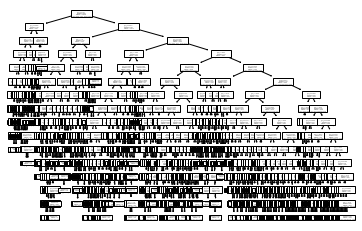

In [38]:
#TODO: Display the decision tree
tree.plot_tree(dt_classifier)

### Step 10 – Summarize the results using one paragraph (2-5 sentences)

This shows that the more depth a tree has the more accurate it will be. For criterion, entropy is better than gini. For the minimum sample split, the lower the value the more accurate the model got. Compared to the accuracy of the original decision tree in module four, this did 5% better. 